In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import optimizers
import os

In [3]:
base_dir = 'mascarillas'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_withmask_dir = os.path.join(train_dir, 'with_mask')
train_withoutmask_dir = os.path.join(train_dir, 'without_mask')

# Directorio con las imagenes de validation
validation_withmask_dir = os.path.join(validation_dir, 'with_mask')
validation_withoutmask_dir = os.path.join(validation_dir, 'without_mask')

# Directorio con las imagenes de test
test_withmask_dir = os.path.join(test_dir, 'with_mask')
test_withoutmask_dir = os.path.join(test_dir, 'without_mask')

In [4]:
train_withmask_fnames = os.listdir( train_withmask_dir )
print(train_withmask_fnames[:3])

train_withoutmask_fnames = os.listdir( train_withoutmask_dir )
print(train_withoutmask_fnames[:3])

validation_withmask_fnames = os.listdir( validation_withmask_dir )
print(validation_withmask_fnames[:3])

validation_withoutmask_fnames = os.listdir( validation_withoutmask_dir )
print(validation_withoutmask_fnames[:3])

test_withmask_fnames = os.listdir( test_withmask_dir )
print(test_withmask_fnames[:3])

test_withoutmask_fnames = os.listdir( test_withoutmask_dir )
print(test_withoutmask_fnames[:3])

['10.png', '100.png', '1004.png']
['10.png', '100.png', '1004.png']
['0017.jpg', '0018.jpg', '0024.jpg']
['0.jpg', '0_0_yaochen_0001.jpg', '0_0_yaochen_0006.jpg']
['0159.jpg', '0160.jpg', '0163.jpg']
['1.png', '10.jpg', '100.jpg']


In [5]:
print('total training with_mask images :', len(os.listdir(train_withmask_dir ) ))
print('total training without_mask imagen images :', len(os.listdir(train_withoutmask_dir ) ))

print('total validation with_mask images :', len(os.listdir( validation_withmask_dir ) ))
print('total validation without_mask images :', len(os.listdir( validation_withoutmask_dir ) ))

print('total test with_mask images :', len(os.listdir( test_withmask_dir ) ))
print('total test without_mask images :', len(os.listdir( test_withoutmask_dir ) ))

total training with_mask images : 4555
total training without_mask imagen images : 4536
total validation with_mask images : 808
total validation without_mask images : 875
total test with_mask images : 1077
total test without_mask images : 1001


(53, 53, 3)


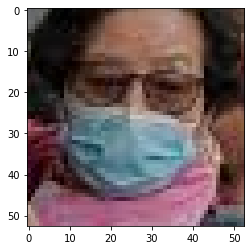

In [6]:
img = os.path.join(train_withmask_dir, train_withmask_fnames[3])
img = mpimg.imread(img)
print(img.shape)
plt.imshow(img)

With Mask


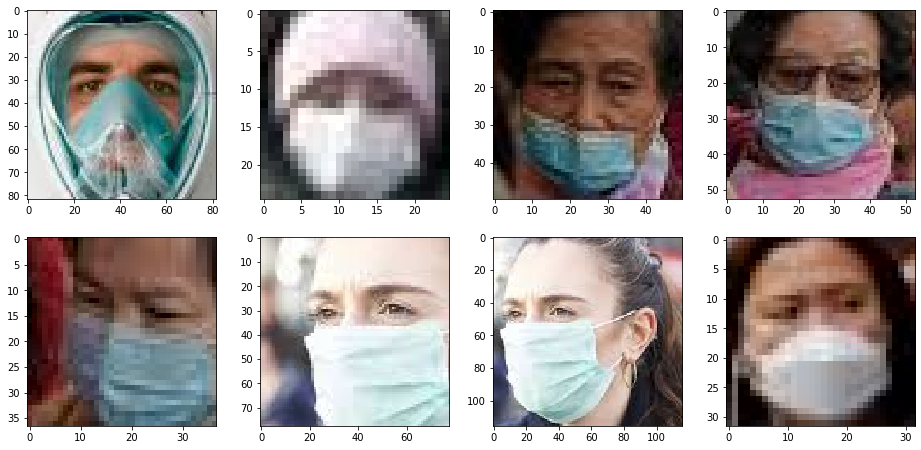

Without Mask


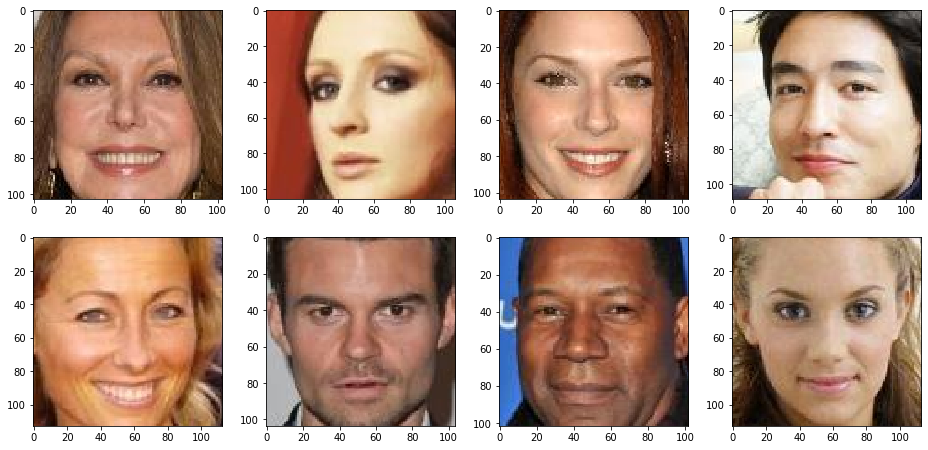

In [7]:
def print_pictures(dir, fnames):
  # presentaremos images en una configuración de 4x4
    nrows = 4
    ncols = 4
    pic_index = 0 # Índice para iterar sobre las imagenes
    fig = plt.gcf()
    fig.set_size_inches(ncols*4, nrows*4)
    pic_index+=8
    next_pix = [os.path.join(dir, fname) for fname in fnames[ pic_index-8:pic_index]]

    for i, img_path in enumerate(next_pix):
        sp = plt.subplot(nrows, ncols, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
    plt.show()

print("With Mask")
print_pictures(train_withmask_dir, train_withmask_fnames)
print("Without Mask")
print_pictures(train_withoutmask_dir, train_withoutmask_fnames)

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid',),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid',),
   
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid',),
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid',),
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu',bias_initializer='zeros'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 64)      1792      
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 240, 240, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 117, 117, 128)     73856     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 119, 119, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 117, 117, 128)     1

In [11]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.02),
              loss='binary_crossentropy',
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=6
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255.,zoom_range=0.2,rotation_range=180 )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255.,zoom_range=0.2,rotation_range=180 )
test_datagen  = ImageDataGenerator( rescale = 1.0/255.,zoom_range=0.2,rotation_range=180 )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(240, 240))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (240, 240))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (240, 240))



Found 9091 images belonging to 2 classes.
Found 1683 images belonging to 2 classes.
Found 2078 images belonging to 2 classes.


In [14]:
len(train_generator.filenames)

9091

In [ ]:
import time
print(time.strftime("%H:%M:%S"))
history = model.fit(train_generator,epochs=10, validation_data=validation_generator, callbacks=[es])
print(time.strftime("%H:%M:%S"))

In [ ]:
history_dict = history.history
print(history_dict.keys())

In [ ]:
# plot model performance
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [15]:
# Guardar el Modelo
# model.save('path_to_my_model.h5')

In [17]:
#Recrea exactamente el mismo modelo solo desde el archivo
model = keras.models.load_model('path_to_my_model.h5')

In [18]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

 62/104 [================>.............] - ETA: 2:32 - loss: 0.4606 - acc: 0.8379

E:\Users\trunk\Anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


104/104 [==============================] - 306s 3s/step - loss: 0.4645 - acc: 0.8321
Test Accuracy: 0.83205


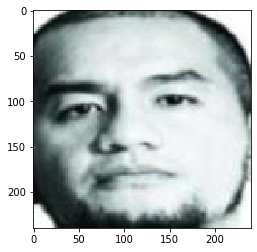

In [59]:
test_generator.next()[0][0].shape
plt.imshow(test_generator.next()[0][0])

Found 10 images belonging to 2 classes.


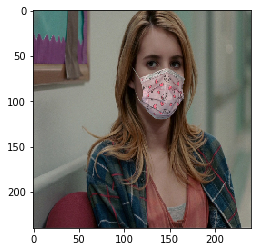

 HAVE A MASK: 0.30612803


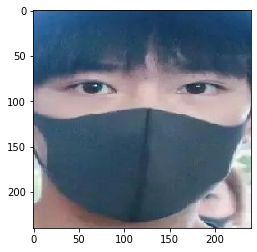

 HAVE A MASK: 0.0148299


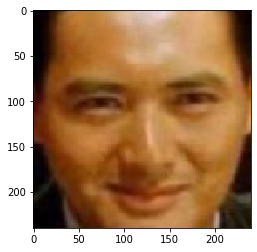

 DONT HAVE A MASK: 0.6633662


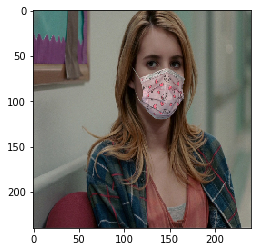

 HAVE A MASK: 0.30612803


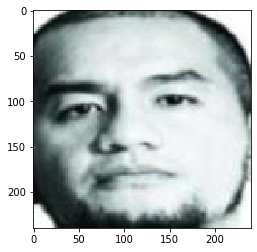

 HAVE A MASK: 0.08134135


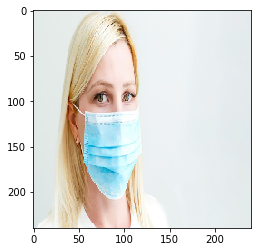

 HAVE A MASK: 0.011582552


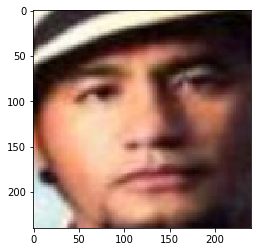

 DONT HAVE A MASK: 0.9737507


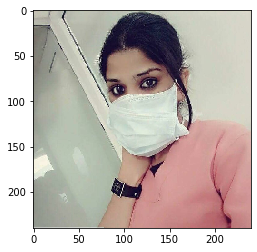

 HAVE A MASK: 0.06750352


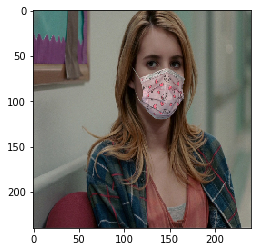

 HAVE A MASK: 0.30612803


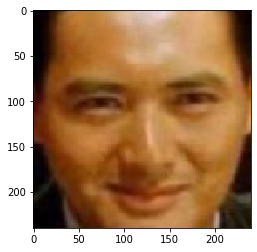

 DONT HAVE A MASK: 0.6633662


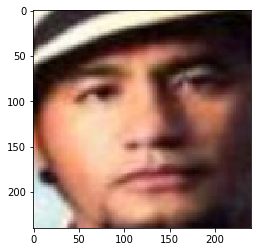

 DONT HAVE A MASK: 0.9737507


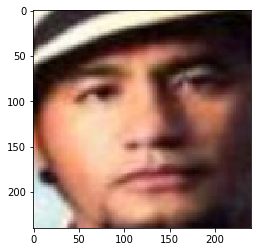

 DONT HAVE A MASK: 0.9737507


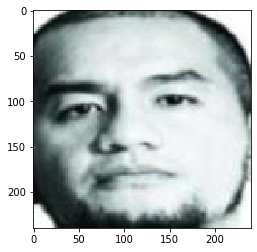

 HAVE A MASK: 0.08134135


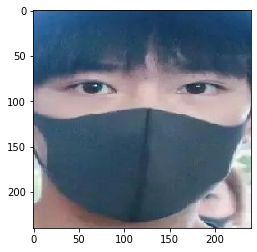

 HAVE A MASK: 0.0148299


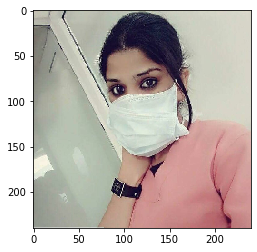

 HAVE A MASK: 0.06750352


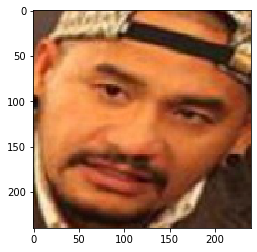

 DONT HAVE A MASK: 0.56547016


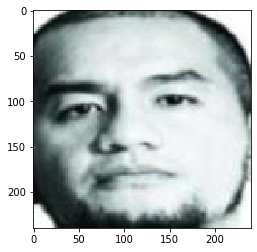

 HAVE A MASK: 0.08134135


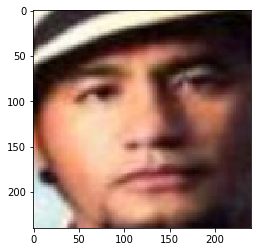

 DONT HAVE A MASK: 0.9737507


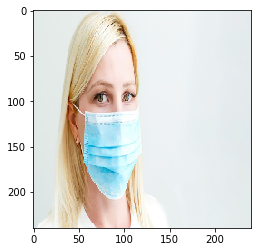

 HAVE A MASK: 0.011582552


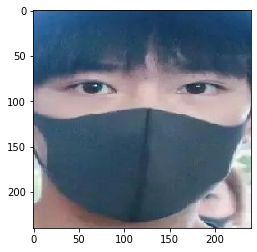

 HAVE A MASK: 0.0148299


In [436]:
test_generator =  test_datagen.flow_from_directory("mascarillas/test/prueba1",
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (240, 240))

for i in range(20):

    x=test_generator.next()[0][0]

    image=np.expand_dims(x, axis=0)  

    classes = model.predict(image)[0][0]

    plt.imshow(image[0])
    plt.show()
    if classes>0.5: print(" DONT HAVE A MASK:", classes)
    else: print(" HAVE A MASK:", classes)

In [73]:
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml') # Detectar la cara de la persona
face_cascade

<CascadeClassifier 00000232E236EB90>

Found 6 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


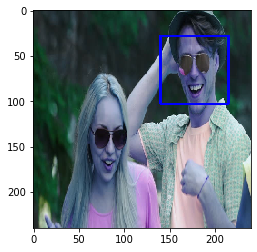

En esta imagen hay 1 personas
Tienen mascarila: 1 personas
No tienen mascarilla: 0 personas


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


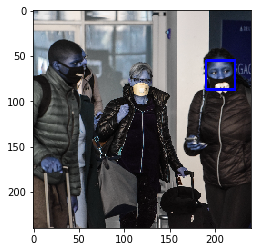

En esta imagen hay 1 personas
Tienen mascarila: 1 personas
No tienen mascarilla: 0 personas


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


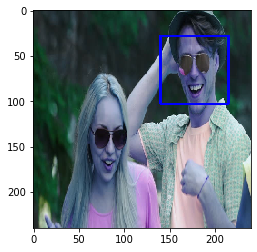

En esta imagen hay 1 personas
Tienen mascarila: 1 personas
No tienen mascarilla: 0 personas


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


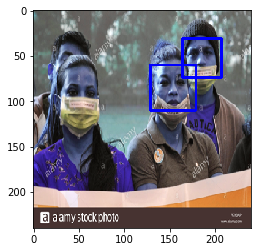

En esta imagen hay 2 personas
Tienen mascarila: 2 personas
No tienen mascarilla: 0 personas


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


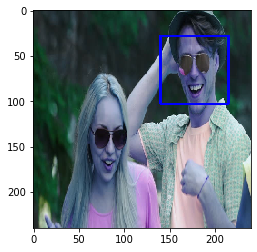

En esta imagen hay 1 personas
Tienen mascarila: 1 personas
No tienen mascarilla: 0 personas


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


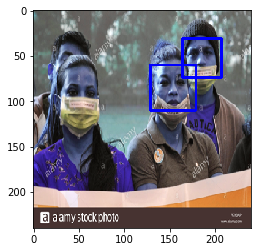

En esta imagen hay 2 personas
Tienen mascarila: 2 personas
No tienen mascarilla: 0 personas


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


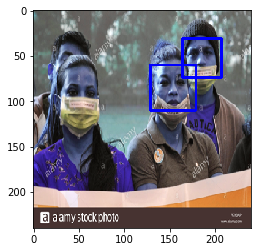

En esta imagen hay 2 personas
Tienen mascarila: 2 personas
No tienen mascarilla: 0 personas


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


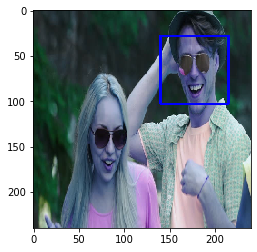

En esta imagen hay 1 personas
Tienen mascarila: 1 personas
No tienen mascarilla: 0 personas


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


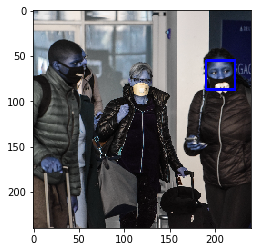

En esta imagen hay 1 personas
Tienen mascarila: 1 personas
No tienen mascarilla: 0 personas


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


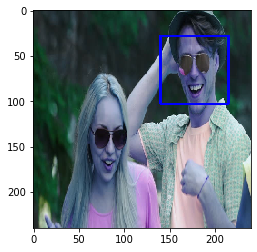

En esta imagen hay 1 personas
Tienen mascarila: 1 personas
No tienen mascarilla: 0 personas


In [459]:
test_generator =  test_datagen.flow_from_directory("mascarillas/test/prueba3",
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (240, 240))

for i in range(10):

    C=test_generator.next()[0][0]
    C2 = C*255

    #img = cv2.imread(C)
    gray = cv2.cvtColor(C2, cv2.COLOR_BGR2GRAY)
    gray = np.array(gray, dtype='uint8')
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
    # add bounding box to color image
        cv2.rectangle(C,(x,y),(x+w,y+h),(255,0,0),2)
    cv_rgb = cv2.cvtColor(C, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    #plt.imshow((cv_rgb * 255).astype(np.uint8))
    plt.show()
    si = 0
    no = 0
    from PIL import Image
    for caras in range(len(faces)):
        x = faces[caras][0]
        y = faces[caras][1]
        w = faces[caras][2]
        h = faces[caras][3]
        #cv_rgb = cv2.cvtColor(C, cv2.COLOR_BGR2RGB)
        image  = C[y-int(h/5):y+h+int(h/5),x-int(w/5):x+w+int(w/5)]
        image = image*255
        image = np.array(image, dtype='uint8')
        image = Image.fromarray(image, mode = 'RGB')
        from scipy.fftpack import dct
        image = image.resize((240,240), Image.ANTIALIAS)
        image = dct(dct(np.asarray(image).T, norm='ortho').T, norm='ortho')

        image=np.expand_dims(image, axis=0) 
        classes = model.predict(image)[0][0]
        if classes>0.5: 
        #print(" Dont Have a Mask")
            no = no + 1
    #else: print(" Have a Mask")

    si = len(faces)-no
    print("En esta imagen hay "+str(len(faces)) + " personas")
    print("Tienen mascarila: "+str(si)+" personas")
    print("No tienen mascarilla: "+str(no)+" personas")